# Add Other Data

Add other data to the TLE dataset

In [2]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

,YEAR,MONTH,DAY,SUNSPOTS_1D,SUNSPOTS_3D,SUNSPOTS_7D
66344,1999,8,24,131,116.333333,90.285714
70318,2010,7,11,36,25.000000,21.857143
63611,1992,2,29,252,266.666667,262.857143


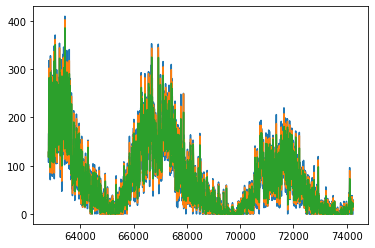

In [14]:
sunspots = pd.read_csv("./sunspots.csv", delimiter=";", names=["YEAR","MONTH","DAY","yf","daily_ss","ss_std","num_obsr","flag"])
sunspots = sunspots[sunspots.yf.between(1989.95,2021.5)]
sunspots['SUNSPOTS_7D'] = sunspots['daily_ss'].rolling(7,1).mean()
sunspots['SUNSPOTS_3D'] = sunspots['daily_ss'].rolling(3,1).mean()
sunspots['SUNSPOTS_1D'] = sunspots['daily_ss']
sunspots = sunspots[['YEAR','MONTH','DAY','SUNSPOTS_1D','SUNSPOTS_3D','SUNSPOTS_7D']]
plt.plot(sunspots[['SUNSPOTS_1D','SUNSPOTS_3D','SUNSPOTS_7D']])
sunspots.sample(3)

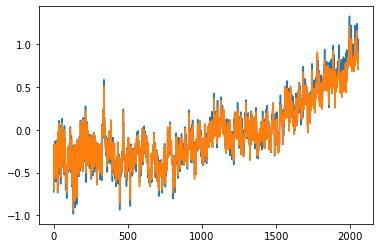

In [18]:
temperatures = pd.read_pickle("temperatures.pkl")
plt.plot(temperatures[['AIR_MONTH_AVG_TEMP','WATER_MONTH_AVG_TEMP']])

In [19]:
def add_data(df):
    df["YEAR"] = df.EPOCH.dt.year
    df["MONTH"] = df.EPOCH.dt.month
    df["DAY"] = df.EPOCH.dt.day
    df = df.merge(sunspots, on=["YEAR", "MONTH", "DAY"]).dropna() # drop if no sunspot data :(
    df = df.merge(temperatures, on=["YEAR", "MONTH"]).dropna() # drop if no temperature data :(
    return df

In [4]:
#TEST

train_df = pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../2_min/train.pkl")
train_ids = np.random.choice(train_df.NORAD_CAT_ID.unique(), 20)
train_df = train_df[train_df.NORAD_CAT_ID.isin(train_ids)]

In [21]:
display(train_df)

display(add_data(train_df).set_index("GP_ID"))

,NORAD_CAT_ID,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION,REV_AT_EPOCH,EPOCH,GP_ID,YEAR,MONTH,DAY
374,19077,6.810000e-06,0.0,0.001147,90.2982,125.3723,0.017206,335.0439,24.2450,13.394284,77898,2004-04-28 04:26:37.233023,1120,2004,4,28
1461,7044,2.410000e-06,0.0,0.002025,102.5734,322.4529,0.008632,305.0062,54.2898,12.442638,38397,2004-04-29 02:53:12.460704,4288,2004,4,29
1800,21955,-4.000000e-08,0.0,0.000100,74.2952,129.2108,0.016307,326.5661,32.5194,12.074541,57945,2004-04-29 09:40:47.049311,5392,2004,4,29
3352,27676,3.440000e-06,0.0,0.000135,98.2990,165.5133,0.011391,126.3476,234.8282,14.315626,6768,2004-04-30 13:41:25.547711,9837,2004,4,30
3655,7044,2.410000e-06,0.0,0.002025,102.5728,324.5415,0.008651,301.5306,57.7316,12.442644,38422,2004-05-01 03:07:39.752544,10698,2004,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55237836,30371,4.530000e-06,0.0,0.000230,98.7294,159.4592,0.000792,215.9902,208.3612,14.207919,73762,2021-04-21 18:47:22.698240,175901334,2021,4,21
55238037,29217,5.175000e-05,0.0,0.000361,97.5430,186.8454,0.011052,167.4434,192.9585,15.009336,84525,2021-04-21 15:17:24.558720,175902000,2021,4,21
55238124,29216,1.450000e-06,0.0,0.000182,98.8928,25.2421,0.023029,21.6667,339.4035,13.675092,44201,2021-04-21 17:11:06.086688,175902249,2021,4,21
55238455,34546,3.770000e-06,0.0,0.000136,74.0334,142.8118,0.002689,272.7223,262.5446,14.369168,63616,2021-04-21 20:13:50.212992,175903870,2021,4,21


,NORAD_CAT_ID,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION,REV_AT_EPOCH,EPOCH,YEAR,MONTH,DAY,SUNSPOTS_1D,SUNSPOTS_3D,SUNSPOTS_7D,AIR_MONTH_AVG_TEMP,WATER_MONTH_AVG_TEMP
GP_ID,,,,,,,,,,,,,,,,,,,,
1120,19077,6.810000e-06,0.0,0.001147,90.2982,125.3723,0.017206,335.0439,24.2450,13.394284,77898,2004-04-28 04:26:37.233023,2004,4,28,35,41.666667,54.285714,0.700,0.619
7758750,7044,2.410000e-06,0.0,0.002025,102.5734,321.9515,0.008599,305.8247,53.4846,12.442637,38391,2004-04-28 15:18:32.371488,2004,4,28,35,41.666667,54.285714,0.700,0.619
7760888,19077,6.740000e-06,0.0,0.001136,90.2980,125.3831,0.017180,333.9763,25.2819,13.394288,77903,2004-04-28 13:24:28.219680,2004,4,28,35,41.666667,54.285714,0.700,0.619
7761513,21955,-4.000000e-08,0.0,0.000100,74.2929,130.4063,0.016371,328.0832,31.0377,12.074534,57933,2004-04-28 09:49:13.764576,2004,4,28,35,41.666667,54.285714,0.700,0.619
4288,7044,2.410000e-06,0.0,0.002025,102.5734,322.4529,0.008632,305.0062,54.2898,12.442638,38397,2004-04-29 02:53:12.460704,2004,4,29,36,36.666667,47.142857,0.700,0.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170761451,34585,1.836000e-05,0.0,0.000315,74.0281,21.0958,0.001821,242.0619,117.8709,14.693733,63280,2021-01-31 08:52:10.327872,2021,1,31,0,0.000000,9.857143,0.883,0.733
170766260,41291,1.092000e-05,0.0,0.000465,98.9746,165.1839,0.005104,59.8867,300.7358,14.265412,26867,2021-01-31 15:07:59.316960,2021,1,31,0,0.000000,9.857143,0.883,0.733
170774412,31848,9.320000e-06,0.0,0.000140,96.6969,215.5201,0.013505,282.0425,76.5678,14.704925,73012,2021-01-31 22:35:06.670752,2021,1,31,0,0.000000,9.857143,0.883,0.733


In [22]:
%%time

# Generate actual data

input_files = [
    (2, "train"),
    (1, "test"),
    (1, "secret_test")
]

for n,f in input_files:
    print(f"Preparing data for: {f}")
    df = add_data(pd.read_pickle(f"{os.environ['GP_HIST_PATH']}/../{n}_min/{f}.pkl")).set_index("GP_ID")
    df.to_pickle(f"{os.environ['GP_HIST_PATH']}/../3_min/{f}.pkl")

Preparing data for: train
Preparing data for: test
Preparing data for: secret_test
CPU times: user 58.4 s, sys: 49.4 s, total: 1min 47s
Wall time: 3min 12s
